In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('mail_data.csv',header=0)

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = df.where((pd.notnull(df)),'')

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.loc[df['Category'] == 'spam','Category',] = 1
df.loc[df['Category'] == 'ham','Category',] = 0

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
X = df['Message']
Y = df['Category']

In [10]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
vect = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [13]:
X_train_features = vect.fit_transform(X_train)
X_test_features = vect.transform(X_test)

In [14]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [15]:
X_train

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object

In [16]:
rfc = RandomForestClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
rfc.fit(X_train_features,Y_train)

RandomForestClassifier(max_depth=15, max_features=0.75, max_samples=0.5,
                       random_state=3)

In [17]:
Y_pred = rfc.predict(X_test_features)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
accuracy_score(Y_test,Y_pred)

0.968609865470852

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.97      0.79      0.87       149

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[962   4]
 [ 31 118]]


Text(0.5, 1.0, 'CONFUSION MATRIX FOR RANDOM FOREST CALSSIFIER')

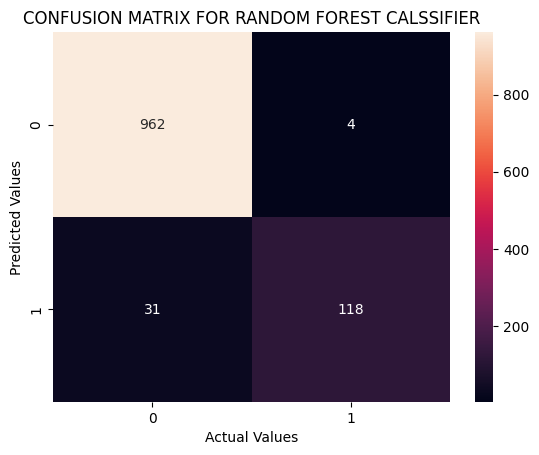

In [27]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR RANDOM FOREST CALSSIFIER')

In [28]:
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_data = vect.transform(input_mail)
prediction = rfc.predict(input_data)
print(prediction)

[1]


In [29]:
import pickle
pickle.dump(vect,open('vector.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))